In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(y_train.shape[0])

(10000, 28, 28)
(10000,)
60000


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimension of the images are not 28x28."
assert(X_test.shape[1:] == (28,28)), "The dimension of the images are not 28x28."

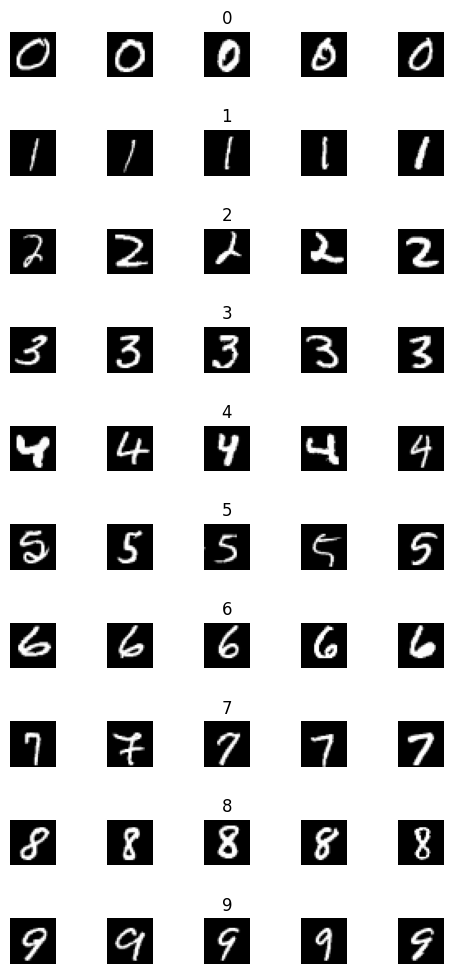

In [ ]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout() # cleans up overlap between plots for aesthetics

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i ==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

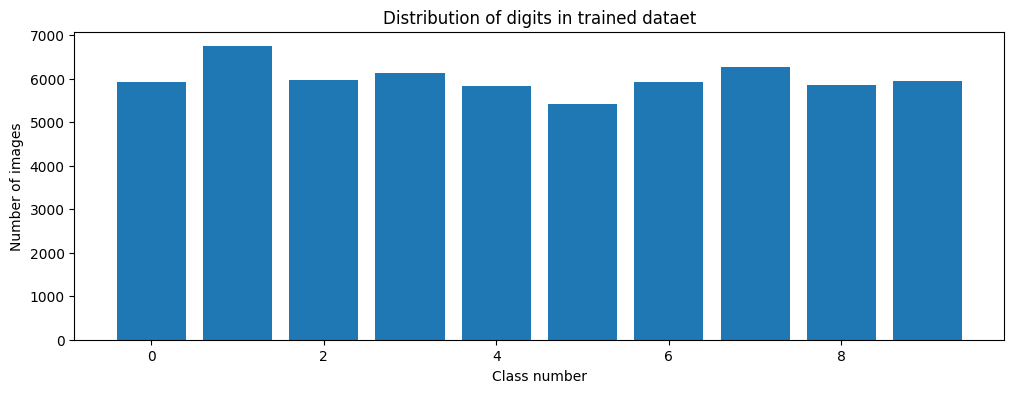

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of digits in trained dataet")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Normalizes pixel intensity to reduce variance in dataset (uniform range) and thus make it easier to learn
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], num_pixels) # flatten pixels to 1D array
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels) # flatten pixels to 1D array


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax')) # softmax converts scores to probabilities
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
 dense_8 (Dense)             (None, 30)                330       
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 1.0176 - accuracy: 0.6619 - val_loss: 0.3661 - val_accuracy: 0.8968
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8944 - val_loss: 0.2726 - val_accuracy: 0.9225
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3130 - accuracy: 0.9090 - val_loss: 0.2456 - val_accuracy: 0.9277
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2823 - accuracy: 0.9184 - val_loss: 0.2321 - val_accuracy: 0.9307
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2623 - accuracy: 0.9242 - val_loss: 0.2212 - val_accuracy: 0.9367
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 0.2039 - val_accuracy: 0.9405
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9317 - val_loss: 0.2059 - val_accuracy: 0.9435
Epoch 

Text(0.5, 0, 'epoch')

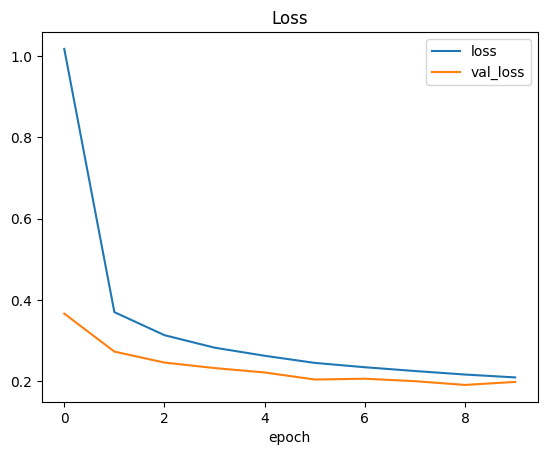

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

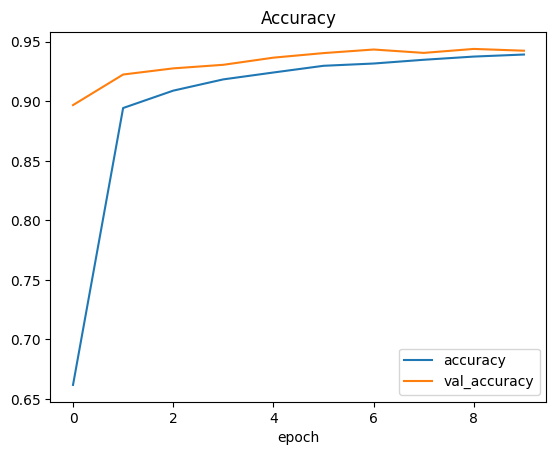

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

<class 'list'>
Test score:  0.22949860990047455
Test accuracy:  0.9369000196456909


<Response [200]>


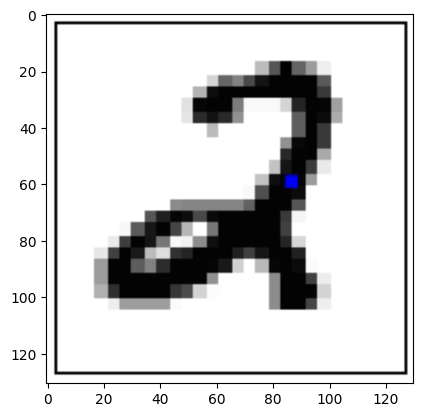

In [ ]:
import requests
from PIL import Image # PIL == Python Imaging Library

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

In [2]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)

# plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
image = cv2.bitwise_not(gray_scale) # swaps colors so white is foreground, black is background
plt.imshow(image, cmap=plt.get_cmap("gray"))

NameError: name 'np' is not defined

In [ ]:
image = image/255 # normalizing
image = image.reshape(1, 784)

In [ ]:
predict_x=model.predict(image)
prediction=np.argmax(predict_x,axis=1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 96ms/step
predicted digit: [2]
